<a href="https://colab.research.google.com/github/NgoMinhQuang/BaiTapAI_CNN/blob/main/NhandangKhuonMat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FACE1/train/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FACE1/train/validation',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 123 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [4]:
#Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'KhongPhaiQuang': 0, 'Quangne`': 1}

In [5]:
#train Model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [6]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 20, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
4/4 [==============================] - 105s 34s/step - loss: 161.0049 - accuracy: 0.7073 - val_loss: 16.6201 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 15.5846 - accuracy: 0.4797 - val_loss: 1.0661e-08 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 1.1630e-08 - accuracy: 1.0000 - val_loss: 1.0661e-08 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 1.1630e-08 - accuracy: 1.0000 - val_loss: 1.0661e-08 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 1.1630e-08 - accuracy: 1.0000 - val_loss: 1.0661e-08 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 1.1630e-08 - accuracy: 1.0000 - val_loss: 1.0661e-08 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 1.1630e-08 - accuracy: 1.0000 - val_loss: 1.0661e-08 - val_accurac

In [7]:
model.save('CNN_Face.h5')

Sai số kiểm tra là:  9.691810909373544e-09
Độ chính xác kiểm tra là:  1.0


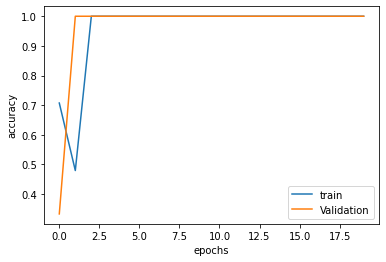

In [8]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [9]:
from keras.models import load_model
CNN_Face=load_model('CNN_Face.h5')

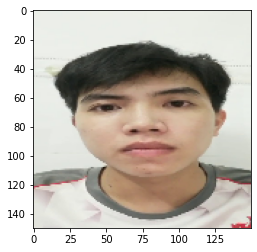

In [10]:
img_path = '/content/drive/MyDrive/Colab Notebooks/FACE1/test/Quangne`/quang_04.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
khuon_mat=np.argmax(CNN_Face.predict(img),axis=1)
pred = model.predict(img)

classes = ['KHÔNG PHẢI QUANG ĐÂU','ĐÚNG QUANG RỒI']

In [12]:
print(np.argmax(pred))
if khuon_mat==0:
  print(classes[0])
else: print(classes[1])

1
ĐÚNG QUANG RỒI
